# 会社法

## 会社の種類
### 会社の種類

+ 会社
     + 持分会社

          + 合同会社 (直接)無限責任社員のみ
          + 合資会社 (直接)有限責任社員のみ & (直接)無限責任社員のみ
          + 合同会社 (間接)有限責任社員のみ

     + 株式会社

          + 株式会社 (間接)有限責任社員のみ
          + 特例有限会社 H18有限会社法廃止


In [19]:
import iplantuml

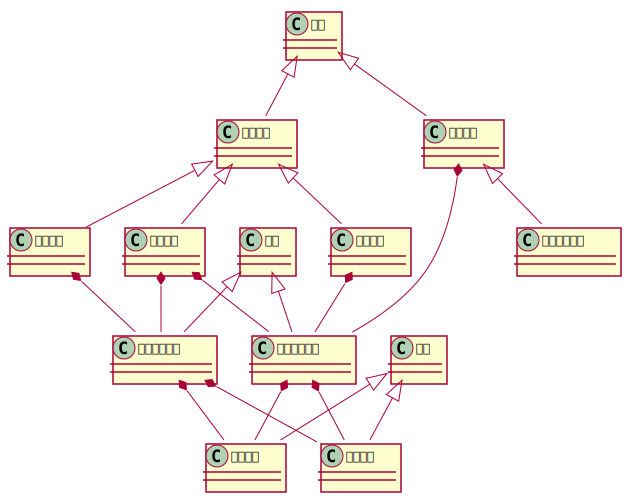

In [31]:
%%plantuml --jar

@startuml
class 会社
会社 <|-- 持分会社
会社 <|-- 株式会社
持分会社 <|-- 合名会社
持分会社 <|-- 合資会社
持分会社 <|-- 合同会社
株式会社 <|-- 特例有限会社
合名会社 *-- 無限責任社員
合資会社 *-- 無限責任社員
合資会社 *-- 有限責任社員
合同会社 *-- 有限責任社員
株式会社 *-- 有限責任社員

class 社員
社員 <|-- 無限責任社員
社員 <|-- 有限責任社員
無限責任社員 *-- 直接責任
無限責任社員 *-- 間接責任
有限責任社員 *-- 直接責任
有限責任社員 *-- 間接責任

class 責任
責任 <|-- 直接責任
責任 <|-- 間接責任
@enduml

In [ ]:
class 会社:
    pass


class 物的会社(会社):
    def __str__(self):
        return "所有と経営が分離"


class 人的会社(会社):
    def __str__(self):
        return "所有と経営が一致"


class 持分会社(人的会社):
    _社員 = []
    _資本 = []

    def __init__(self, 社員構成):
        self._社員 = 社員構成
        self._法人格 = True

    @property
    def 社員(self):
        return self._社員

    @property
    def 法人格(self):
        return self._法人格

    @property
    def 資本(self):
        return self._資本    

    def 権利義務の帰属主体(self):
        return self._法人格


In [ ]:

class 社員:
    _責任 = 責任()
    _権利 = []
    _資本 = {}

    def __init__(self, 責任, 資本=None):
        if 資本 is None:
            資本 = {'財産': 財産(), '信用': 信用(), '労務': 労務()}
        self._責任 = 責任
        self._資本 = 資本

    @property
    def 責任(self):
        return self._責任

    @property
    def 権利(self):
        return self._権利

    @権利.setter
    def 権利(self, 権利):
        self._権利 = 権利

    @property
    def 資本(self):
        return self._資本

    @資本.setter
    def 資本(self, 資本):
        self._資本 = 資本

    def 出資(self, 資本):
        出資 = self._資本[資本]
        del self._資本[資本]
        return 出資

    def 承認(self, 社員):
        return False

    def __hash__(self):
        return hash(repr(self))

    def __eq__(self, other):
        if not isinstance(other, self.__class__):
            return False
        if self.責任 != other.責任:
            return False
        return type(self) == type(other)

    def __ne__(self, other):
        if not isinstance(other, self.__class__):
            return True
        return type(self) != type(other)


class 無限責任社員(社員):
    pass


class 有限責任社員(社員):
    pass


In [ ]:

class 責任:
    def __eq__(self, other):
        if not isinstance(other, self.__class__):
            return False
        return type(self) == type(other)

    def __ne__(self, other):
        if not isinstance(other, self.__class__):
            return True
        return type(self) != type(other)


class 直接責任(責任):
    pass


class 間接責任(責任):
    pass


class 権利:
    def __eq__(self, other):
        if not isinstance(other, self.__class__):
            return False
        return type(self) == type(other)

    def __ne__(self, other):
        if not isinstance(other, self.__class__):
            return True
        return type(self) != type(other)


class 業務執行権(権利):
    pass


class 会社代表権(権利):
    pass


In [ ]:

class 資本:
    def __eq__(self, other):
        if not isinstance(other, self.__class__):
            return False
        return type(self) == type(other)

    def __ne__(self, other):
        if not isinstance(other, self.__class__):
            return True
        return type(self) != type(other)


class 財産(資本):
    pass


class 信用(資本):
    pass


class 労務(資本):
    pass


### 合名会社

1. 定義
 
    + 直接無限責任社員のみからなる会社
    + 法人である以上、権利・義務の帰属主体となる

1. 特質

    + 社員は業務執行権と会社代表権を持つ
    + 出資の目的は、財産・信用・労務のいずれでもよい
    + 退社制度が認められる
    + 他の社員の承諾がない限り、原則として持分の譲渡はできない
    + 定款によって持分の譲渡を禁止することができる

1. 設立

In [24]:
import unittest


class 合名会社(持分会社):
    def __init__(self, 社員構成):
        if 有限責任社員(間接責任()) in 社員構成:
            raise Exception('無限責任社員のみ')
        if 有限責任社員(直接責任()) in 社員構成:
            raise Exception('無限責任社員のみ')

        [社員.権利.append(業務執行権()) for 社員 in 社員構成]
        [社員.権利.append(会社代表権()) for 社員 in 社員構成]

        self._社員 = 社員構成
        self._法人格 = True

        [self._資本.append(社員.出資('財産')) for 社員 in self._社員]
        [self._資本.append(社員.出資('信用')) for 社員 in self._社員]
        [self._資本.append(社員.出資('労務')) for 社員 in self._社員]

    def 退社(self, 社員):
        self._社員.remove(社員)

    def 持分の譲渡(self, 譲渡する社員):
        承認社員 = self._社員
        承認社員.remove(譲渡する社員)
        for 社員 in 承認社員:
            if not 社員.承認(譲渡する社員):
                raise Exception('持分の譲渡はできない')
            else:
                self._社員.remove(譲渡する社員)


class 合名会社テスト(unittest.TestCase):
    def test_合名会社は持分会社(self):
        self.assertTrue(issubclass(合名会社, 持分会社))

    def test_合名会社は無限責任社員のみで構成される(self):
        社員 = 無限責任社員(直接責任())
        会社 = 合名会社([社員])
        self.assertIn(会社.社員[0], [社員])

        with self.assertRaises(Exception) as cm:
            合名会社([有限責任社員(直接責任())])
        self.assertEqual(cm.exception.args[0], '無限責任社員のみ')

    def test_合名会社は所有と経営が一致している(self):
        社員 = 無限責任社員(直接責任())
        会社 = 合名会社([社員])
        self.assertEqual(str(会社), '所有と経営が一致')

    def test_合名会社は法人格を持つ(self):
        社員 = 無限責任社員(直接責任())
        会社 = 合名会社([社員])
        self.assertTrue(会社.法人格)

    def test_合名会社は権利義務の帰属主体となる(self):
        社員 = 無限責任社員(直接責任())
        会社 = 合名会社([社員])
        self.assertTrue(会社.権利義務の帰属主体())

    def test_合名会社の社員は業務執行権と会社代表権を持つ(self):
        社員 = 無限責任社員(直接責任())
        会社 = 合名会社([社員])
        self.assertIn(業務執行権(), 会社.社員[0].権利)
        self.assertIn(会社代表権(), 会社.社員[0].権利)

    def test_合名会社の出資の目的は財産信用労務のいずれでも良い(self):
        社員 = 無限責任社員(直接責任())
        会社 = 合名会社([社員])
        self.assertIn(財産(), 会社.資本)
        self.assertIn(信用(), 会社.資本)
        self.assertIn(労務(), 会社.資本)

    def test_合名会社の社員は退社制度が認められる(self):
        社員1 = 無限責任社員(直接責任())
        社員2 = 無限責任社員(直接責任())
        会社 = 合名会社([社員1, 社員2])
        会社.退社(社員1)
        self.assertIn(会社.社員[0], [社員2])

    def test_合名会社の社員は他の社員の承諾がない限り原則として持分の譲渡はできない(self):
        社員1 = 無限責任社員(直接責任())
        社員2 = 無限責任社員(直接責任())
        社員3 = 無限責任社員(直接責任())
        会社 = 合名会社([社員1, 社員2, 社員3])
        with self.assertRaises(Exception) as cm:
            会社.持分の譲渡(社員1)
        self.assertEqual(cm.exception.args[0], '持分の譲渡はできない')


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.

.

.

F

.

.

.

.

.

.

.

.

.

.

### 合資会社

1. 定義
 
    + 直接無限責任社員と直接有限責任社員からなる会社
    + 法人である以上、権利・義務の帰属主体となる

1. 特質

    + 各社員は原則として業務執行権を有し、義務を負う
    + 直接有限責任社員の出資は金銭等に限られ、信用・労務による出資はできない    

1. 設立

In [21]:
import unittest


class 合資会社(持分会社):    
    def __init__(self, 社員構成):
        if len(社員構成) < 2:
            raise Exception('構成員2名以上')
        if 有限責任社員(直接責任()) not in 社員構成:
            raise Exception('有限責任社員が必要')
        if 無限責任社員(直接責任()) not in 社員構成:
            raise Exception('無限責任社員が必要')

        [社員.権利.append(業務執行権()) for 社員 in 社員構成]

        self._社員 = 社員構成
        self._法人格 = True

        for 社員 in self._社員:
            if type(社員) is type(有限責任社員(直接責任())):            
                if 社員.資本['財産'] is None:
                    raise Exception('直接有限責任社員の出資は金銭等に限られる')

        [self._資本.append(社員.出資('財産')) for 社員 in self._社員]
        [self._資本.append(社員.出資('信用')) for 社員 in self._社員 if type(社員) is type(無限責任社員(直接責任()))]
        [self._資本.append(社員.出資('労務')) for 社員 in self._社員 if type(社員) is type(無限責任社員(直接責任()))]
                

class 合資会社テスト(unittest.TestCase):
    def test_合資会社は持分会社(self):
        self.assertTrue(issubclass(合資会社, 持分会社))

    def test_合資会社は有限責任社員と無限責任社員で構成される(self):
        社員1 = 有限責任社員(直接責任())
        社員2 = 無限責任社員(直接責任())
        会社 = 合資会社([社員1, 社員2])
        self.assertIn(会社.社員[0], [社員1])
        self.assertIn(会社.社員[1], [社員2])

        with self.assertRaises(Exception) as cm:
            合資会社([社員1])
        self.assertEqual(cm.exception.args[0], '構成員2名以上')

        with self.assertRaises(Exception) as cm:
            合資会社([社員1,社員1])
        self.assertEqual(cm.exception.args[0], '無限責任社員が必要')

        with self.assertRaises(Exception) as cm:
            合資会社([社員2,社員2])
        self.assertEqual(cm.exception.args[0], '有限責任社員が必要')

    def test_合資会社は所有と経営が一致している(self):
        社員1 = 有限責任社員(直接責任())
        社員2 = 無限責任社員(直接責任())
        会社 = 合資会社([社員1, 社員2])
        self.assertEqual(str(会社), '所有と経営が一致')

    def test_合資会社は法人格を持つ(self):
        社員1 = 有限責任社員(直接責任())
        社員2 = 無限責任社員(直接責任())
        会社 = 合資会社([社員1, 社員2])
        self.assertTrue(会社.法人格)

    def test_合資会社の各社員は原則として業務執行権を持つ(self):
        社員1 = 有限責任社員(直接責任())
        社員2 = 無限責任社員(直接責任())
        会社 = 合資会社([社員1, 社員2])
        self.assertIn(業務執行権(),会社.社員[0].権利)
        self.assertIn(業務執行権(),会社.社員[1].権利)

    def test_合資会社の直接有限責任社員の出資は金銭等に限られる(self):
        社員1 = 有限責任社員(直接責任(),{'財産': None, '信用': 信用(), '労務': None})
        社員2 = 無限責任社員(直接責任(),{'財産': 財産(), '信用': None, '労務': None})

        with self.assertRaises(Exception) as cm:
            会社 = 合資会社([社員1, 社員2])                    
        self.assertEqual(cm.exception.args[0],'直接有限責任社員の出資は金銭等に限られる')

    def test_合資会社の直接無限責任社員の出資は金銭等信用労務(self):
        社員1 = 有限責任社員(直接責任(),{'財産': 財産(), '信用': None, '労務': None})
        社員2 = 無限責任社員(直接責任(),{'財産': None, '信用': 信用(), '労務': 労務()})
        会社 = 合資会社([社員1, 社員2])
        self.assertIn(信用(),会社.資本)
        self.assertIn(労務(),会社.資本)
        

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.

.

.

F

.

.

.

.

.

.

.

.

.

.

.

### 合同会社

1. 定義
 
    + 間接有限責任社員からなる持分会社
    + 法人である以上、権利・義務の帰属主体となる

1. 特質

    + 各社員は原則として業務執行権を有し、義務を負う
    + 出資は金銭等に限られ、信用・労務による出資はできない

1. 設立

     社員になろうとする物が、定款作成後、設立の登記をする時までに、その出資にかかわる金銭の全額を払込み、または、その出資にかかわる金銭以外の財産を全部給付しなければならない点は株式会社と同じ。
　　

In [25]:
import unittest

class 合同会社(持分会社):
    def __init__(self, 社員構成):
        if 無限責任社員(直接責任()) in 社員構成:
            raise Exception('有限責任社員のみ')
        if 無限責任社員(間接責任()) in 社員構成:
            raise Exception('有限責任社員のみ')

        [社員.権利.append(業務執行権()) for 社員 in 社員構成]

        self._社員 = 社員構成
        self._法人格 = True

        for 社員 in self._社員:
            if 社員.資本['財産'] is None:
                raise Exception('出資は金銭等に限られる')

        [self._資本.append(社員.出資('財産')) for 社員 in self._社員]
        
    
class 合同会社テスト(unittest.TestCase):
    def test_合同会社は持分会社(self):
        self.assertTrue(issubclass(合同会社, 持分会社))

    def test_合同会社は有限責任社員のみで構成される(self):
        社員 = 有限責任社員(間接責任())
        会社 = 合同会社([社員])
        self.assertIn(会社.社員[0], [社員])

        with self.assertRaises(Exception) as cm:
            合同会社([無限責任社員(間接責任())])
        self.assertEqual(cm.exception.args[0], '有限責任社員のみ')

    def test_合同会社は所有と経営が一致している(self):
        社員 = 有限責任社員(間接責任)
        会社 = 合同会社([社員])
        self.assertEqual(str(会社), '所有と経営が一致')

    def test_合同会社は法人格を持つ(self):
        社員 = 有限責任社員(間接責任)
        会社 = 合同会社([社員])
        self.assertTrue(会社.法人格)

    def test_合同会社の社員は原則として業務執行権を有し義務を負う(self):
        社員 = 有限責任社員(間接責任)
        会社 = 合同会社([社員])
        self.assertIn(業務執行権(), 会社.社員[0].権利)

    def test_合同会社の出資は金銭等に限られ信用労務による出資はできない(self):
        社員 = 有限責任社員(間接責任,{'財産': 財産(), '信用': None, '労務': None})
        会社 = 合同会社([社員])
        self.assertIn(財産(), 会社.資本)
        
        社員 = 有限責任社員(間接責任,{'財産': None, '信用': 信用(), '労務': 労務()})
        with self.assertRaises(Exception) as cm:
            会社 = 合同会社([社員])
        self.assertEqual(cm.exception.args[0],'出資は金銭等に限られる')
        
                
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

### 株式会社

1. 定義
 
    + 社員の地位が、細分化された割当的単位の形式をとる
    + 間接有限責任社員から構成される
    + 会社債権者に対しては直接の責任を負わない
    + 法人である以上、権利・義務の帰属主体となる

1. 特質

    + 所有と経営の分離が認められる
    + 株主は、間接有限責任しか負わない
    + 期間設計の柔軟化が広く認められる
    + 対価の柔軟性が認められるようになった
    + 株主に退社制度が認められないことから、原則として株式の払い戻しは認められないが、株式を譲渡することで投下資本を回収できる


In [28]:
import unittest

class 株式会社(物的会社):
    def __init__(self, 社員構成):
        if 無限責任社員(直接責任()) in 社員構成:
            raise Exception('有限責任社員のみ')
        self.__社員 = 社員構成
        self.__法人格 = True

    @property
    def 社員(self):
        return self.__社員

    @property
    def 法人格(self):
        return self.__法人格

    def 退社制度(self,社員):
        raise Exception('退社制度は認められない')

    def 株式の譲渡(self, 譲渡する社員):
        self.__社員.remove(譲渡する社員)
        self.__社員.append(有限責任社員(間接責任()))
        

class 特例有限会社(株式会社):
    def __init__(self, 社員):
        raise Exception('H18有限会社法廃止')
        
                
class 株式会社テスト(unittest.TestCase):
    def test_持分会社は会社(self):
        self.assertTrue(issubclass(持分会社, 会社))

    def test_株式会社は会社(self):
        self.assertTrue(issubclass(株式会社, 会社))

    def test_株式会社は物的会社(self):
        self.assertTrue(issubclass(株式会社, 物的会社))

    def test_株式会社は有限責任社員のみで構成される(self):
        社員 = 有限責任社員(間接責任())
        会社 = 株式会社([社員])
        self.assertIn(会社.社員[0], [社員])

        with self.assertRaises(Exception) as cm:
            株式会社([無限責任社員(直接責任())])
        self.assertEqual(cm.exception.args[0], '有限責任社員のみ')

    def test_株式会社は所有と経営が分離(self):
        会社 = 株式会社([有限責任社員(間接責任())])
        self.assertEqual(str(会社), '所有と経営が分離')

    def test_特例有限会社は株式会社(self):
        self.assertTrue(issubclass(特例有限会社, 株式会社))

    def test_H18有限責任会社廃止(self):
        with self.assertRaises(Exception) as cm:
            特例有限会社([有限責任社員(間接責任())])
        self.assertEqual(cm.exception.args[0], 'H18有限会社法廃止')

    def test_株式会社の社員は退社制度が認められない(self):
        社員1 = 有限責任社員(間接責任())
        社員2 = 有限責任社員(間接責任())
        会社 = 株式会社([社員1, 社員2])
        with self.assertRaises(Exception) as cm:
            会社.退社制度(社員2)
        self.assertEquals(cm.exception.args[0], '退社制度は認められない')
        self.assertEqual(len(会社.社員), 2)

    def test_株式会社の社員は株式を譲渡して投下資本を回収できる(self):
        社員1 = 有限責任社員(間接責任())
        社員2 = 有限責任社員(間接責任())
        会社 = 株式会社([社員1, 社員2])
        会社.株式の譲渡(社員2)
        self.assertEquals(len(会社.社員), 2)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

F

.